## All Cancer Integration Notebook 03: Clean & Annotation 

This is the Jupyter Notebook to annotate the integrated meta AnnData object from all datasets. As a result, cells from the integrated meta AnnData are annotated briefly.

In [1]:
import scanpy as sc
import celltypist
from rich import print
from celltypist import models

In [3]:
# Load the meta AnnData
pre = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer/all_cancer_meta_anndata_scVI_pca.h5ad')
post = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer/all_cancer_meta_anndata_scVI_cluster.h5ad')

In [6]:
print(pre)
print(post)

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 
'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 
'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 
'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 
'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'hvg', 'neighbors', 'pca', 
'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 
'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 
'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 
'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 
'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 
'neighbors', 'pca', 'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

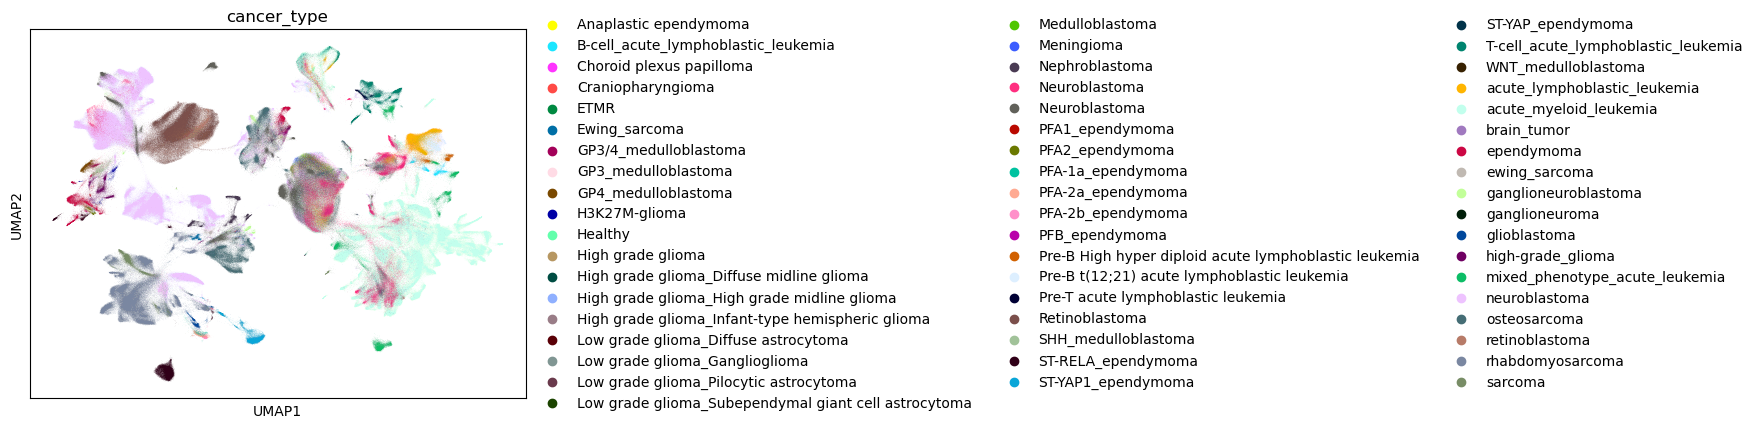

In [9]:
sc.pl.umap(pre, color=['cancer_type'])

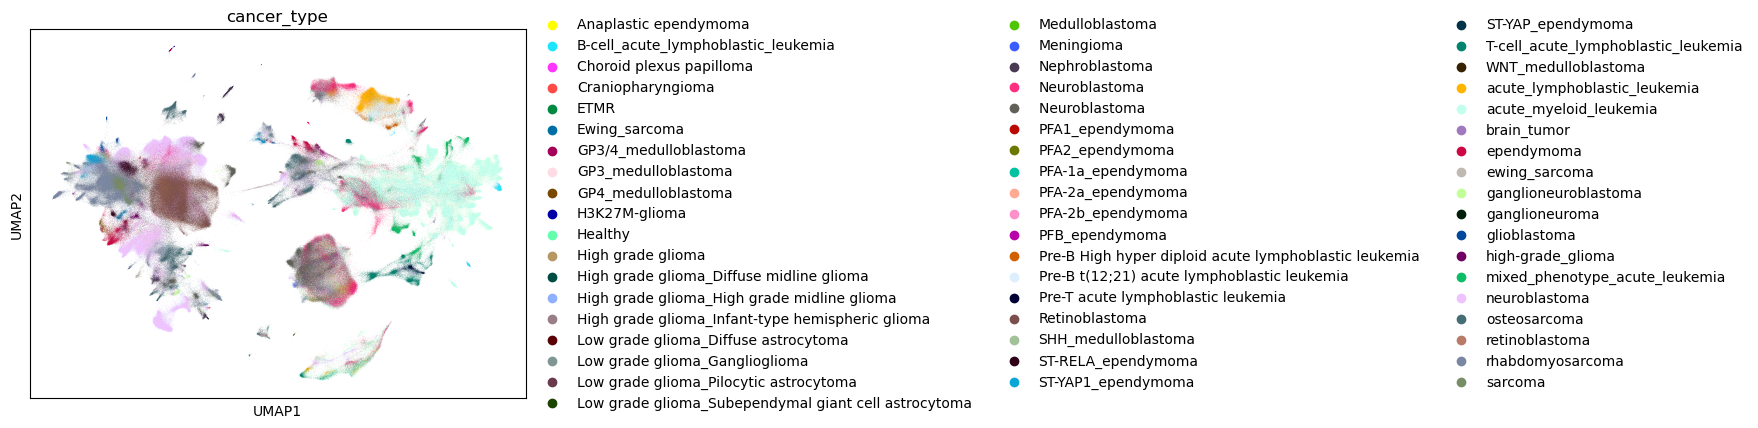

In [11]:
sc.pl.umap(post, color=['cancer_type'])

In [106]:
prex = pre.copy()
postx = post.copy()

metas = {'Pre-integration': prex, 'Post-integration': postx}

## 1. Separate cancer types into three columns

major_cancer_type: leukemia, brain_tumor, bone_cancer, rhabdomyosarcoma, neuroblastoma, retinoblastoma, kidney_cancer & healthy_donor

cancer_type: e.g. ependymoma (from brain_tumor) & healthy_donor

cancer_subtype: e.g. PFA1_ependymoma (from brain_tumor) & healthy_donor

In [107]:
major_cancer_type_dict = {
    'GSE235923': 'leukemia',
    'GSE236351': 'leukemia',
    'GSE154109': 'leukemia',
    'GSE235063': 'leukemia',
    'GSE132509': 'leukemia',
    'GSE227122': 'leukemia',
    'GSE148218': 'leukemia',
    'GSE102130': 'brain_tumor',
    'GSE125969': 'brain_tumor',
    'GSE221776': 'brain_tumor',
    'GSE189939': 'brain_tumor',
    'GSE231860': 'brain_tumor',
    'GSE155446': 'brain_tumor',
    'GSE141460': 'brain_tumor',
    'GSE198896': 'bone_cancer',
    'GSE243347': 'bone_cancer',
    'GSE162454': 'bone_cancer',
    'GSE152048': 'bone_cancer',
    'GSE195709': 'rhabdomyosarcoma',
    'GSE174376': 'rhabdomyosarcoma',
    'GSE137804': 'neuroblastoma',
    'GSE140819': 'neuroblastoma',
    'GSE216176': 'neuroblastoma',
    'GSE147766': 'neuroblastoma',
    'GSE192906': 'neuroblastoma',
    'GSE168434': 'retinoblastoma',
    'GSE249995': 'retinoblastoma',
    'PRJNA737188': 'retinoblastoma',
    'GSE223373': 'kidney_cancer',
}

healthy_donor_dict = {
    'GSM3872444_PBMMC_3': 'healthy_donor',
    'GSM3872442_PBMMC_1': 'healthy_donor',
    'GSM3872443_PBMMC_2': 'healthy_donor',

    'GSM5959142_Healthy_donor_PBMC': 'healthy_donor',

    'GSM4654667_F366': 'healthy_donor',
    'GSM4088788_F107': 'healthy_donor',
    'GSM4088787_F106': 'healthy_donor',
    'GSM4654668_F379': 'healthy_donor',
    'GSM4088786_F7': 'healthy_donor',
    'GSM4088785_F2': 'healthy_donor',

    'GSM6946667_WT-RBG-N_matrix': 'healthy_donor',
}

In [108]:
len(major_cancer_type_dict)

29

In [109]:
# Create the major_cancer_type column

for meta in metas:
    print(meta)
    adata = metas[meta]

    adata.obs['major_cancer_type'] = adata.obs['dataset'].map(major_cancer_type_dict)
    # Update the healthy_donor info
    adata.obs.loc[adata.obs['sample_barcode'].isin(healthy_donor_dict.keys()), 'major_cancer_type'] = adata.obs['sample_barcode'].map(healthy_donor_dict)

    print(adata.obs[['major_cancer_type', 'cancer_type']])
    print(adata.obs['major_cancer_type'].value_counts())

Pre-integration

major_cancer_type  \
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D            leukemia   
...                                                              ...   
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCATTCACGCACGAACTTA_GSM6946667_W...     healthy_donor   

                                                               cancer_type  
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
...                                                                    ...  
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCATTCACGCACGAACTTA_GSM6946667_W...          Nephroblastoma  

[1300958 rows x 2 columns]

major_cancer_type
leukemia            419590
neuroblastoma       322798
brain_tumor         132384
retinoblastoma      129654
rhabdomyosarcoma    112186
bone_cancer          89666
healthy_donor        86217
kidney_cancer         8463
Name: count, dtype: int64

Post-integration

major_cancer_type  \
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D            leukemia   
...                                                              ...   
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCATTCACGCACGAACTTA_GSM6946667_W...     healthy_donor   

                                                               cancer_type  
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
...                                                                    ...  
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCATTCACGCACGAACTTA_GSM6946667_W...          Nephroblastoma  

[1300958 rows x 2 columns]

major_cancer_type
leukemia            419590
neuroblastoma       322798
brain_tumor         132384
retinoblastoma      129654
rhabdomyosarcoma    112186
bone_cancer          89666
healthy_donor        86217
kidney_cancer         8463
Name: count, dtype: int64

Pre-integration

... storing 'major_cancer_type' as categorical


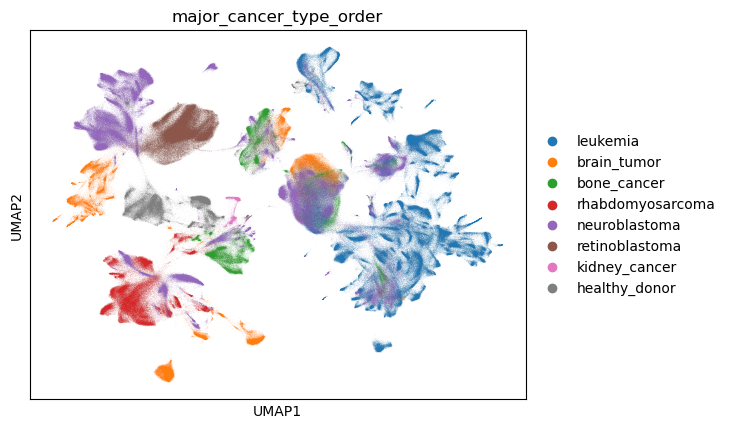

Post-integration

... storing 'major_cancer_type' as categorical


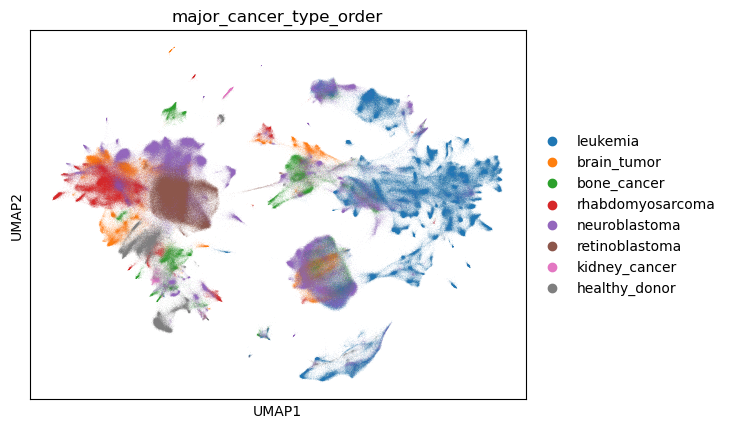

In [110]:
import pandas as pd

major_cancer_type_order = ['leukemia', 'brain_tumor', 'bone_cancer', 'rhabdomyosarcoma', 'neuroblastoma', 'retinoblastoma', 'kidney_cancer', 'healthy_donor']

for meta in metas:
    print(meta)
    adata = metas[meta]

    adata.obs['major_cancer_type_order'] = pd.Categorical(
        values=adata.obs.major_cancer_type, categories=major_cancer_type_order, ordered=True
    )

    sc.pl.umap(
        adata,
        color=['major_cancer_type_order']
    )

In [111]:
cancer_type_dict = {
    'Healthy': 'healthy_donor',
    'Pre-T acute lymphoblastic leukemia': 'acute_lymphoblastic_leukemia',
    'Pre-B t(12;21) acute lymphoblastic leukemia': 'acute_lymphoblastic_leukemia',
    'Pre-B High hyper diploid acute lymphoblastic leukemia': 'acute_lymphoblastic_leukemia',

    'B-cell_acute_lymphoblastic_leukemia': 'acute_lymphoblastic_leukemia',

    'T-cell_acute_lymphoblastic_leukemia': 'acute_lymphoblastic_leukemia',

    'H3K27M-glioma': 'glioma',

    'GP4_medulloblastoma': 'medulloblastoma',
    'GP4_medulloblastoma': 'medulloblastoma',
    'GP3_medulloblastoma': 'medulloblastoma',
    'WNT_medulloblastoma': 'medulloblastoma',
    'GP3/4_medulloblastoma': 'medulloblastoma',

    'ST-YAP1_ependymoma': 'ependymoma',
    'ST-RELA_ependymoma': 'ependymoma',
    'PFA-2b_ependymoma': 'ependymoma',
    'PFA-2a_ependymoma': 'ependymoma',
    'PFA-1a_ependymoma': 'ependymoma',

    'PFA1_ependymoma': 'ependymoma',
    'PFA2_ependymoma': 'ependymoma',
    'PFB_ependymoma': 'ependymoma',
    'ST-YAP_ependymoma': 'ependymoma',
    'ST-RELA_ependymoma': 'ependymoma',

    'SHH_medulloblastoma': 'medulloblastoma',
    'PF-A_ependymoma': 'ependymoma',
    'PF-B_ependymoma': 'ependymoma',
    'SP-MPE_ependymoma': 'ependymoma',
    'ST-Midline_ependymoma': 'ependymoma',

    'high-grade_glioma': 'glioma',

    'Choroid plexus papilloma': 'choroid_plexus_papilloma',
    'Low grade glioma_Pilocytic astrocytoma': 'glioma',
    'Low grade glioma_Ganglioglioma': 'glioma',
    'Medulloblastoma': 'medulloblastoma',
    'High grade glioma': 'glioma',
    'High grade glioma_High grade midline glioma': 'glioma',
    'High grade glioma_Diffuse midline glioma': 'glioma',
    'Anaplastic ependymoma': 'ependymoma',
    'Craniopharyngioma': 'craniopharyngioma',
    'Low grade glioma_Diffuse astrocytoma': 'glioma',
    'High grade glioma_Infant-type hemispheric glioma': 'glioma',
    'Low grade glioma_Subependymal giant cell astrocytoma': 'glioma',
    'Meningioma': 'meningioma', 

    'Ewing_sarcoma': 'ewing_sarcoma',

    'Neuroblastoma\xa0': 'neuroblastoma',
    'Neuroblastoma': 'neuroblastoma',

    'Retinoblastoma': 'retinoblastoma',

    'Nephroblastoma': 'nephroblastoma',
}

In [112]:
# Create cancer_subtype from cancer_type

for meta in metas:
    print(meta)
    adata = metas[meta]

    # Join existing cancer_subtype to cancer_type
    adata.obs['cancer_type'] = adata.obs['cancer_type'].astype(str)
    adata.obs['cancer_subtype'] = adata.obs['cancer_subtype'].astype(str)
    adata.obs.loc[adata.obs['cancer_subtype'] != 'nan', 'cancer_type'] = adata.obs['cancer_subtype'] + '_' + adata.obs['cancer_type']

    # Create the cancer_subtype
    adata.obs['cancer_subtype'] = adata.obs['cancer_type']
    
    # Update the cancer_type
    adata.obs['cancer_type'] = adata.obs['cancer_type'].replace(cancer_type_dict)

    # Update the healthy_donor info
    adata.obs.loc[adata.obs['sample_barcode'].isin(healthy_donor_dict.keys()), 'cancer_type'] = adata.obs['sample_barcode'].map(healthy_donor_dict)
    adata.obs.loc[adata.obs['sample_barcode'].isin(healthy_donor_dict.keys()), 'cancer_subtype'] = adata.obs['sample_barcode'].map(healthy_donor_dict)


Pre-integration

Post-integration

In [113]:
adata.obs[['major_cancer_type', 'cancer_type', 'cancer_subtype']]

,major_cancer_type,cancer_type,cancer_subtype
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
...,...,...,...
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_WT-RBG-N_matrix,healthy_donor,healthy_donor,healthy_donor
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_WT-RBG-N_matrix,healthy_donor,healthy_donor,healthy_donor
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_WT-RBG-N_matrix,healthy_donor,healthy_donor,healthy_donor
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_WT-RBG-N_matrix,healthy_donor,healthy_donor,healthy_donor


In [114]:
len(adata.obs['cancer_type'].unique())

22

In [115]:
len(adata.obs['cancer_subtype'].unique())

59

In [119]:
cancer_type_order = []

for major in major_cancer_type_order:
    cancer_types = prex.obs[prex.obs['major_cancer_type'] == major]['cancer_type'].unique()
    cancer_type_order.extend(cancer_types)

print(len(cancer_type_order))
print(cancer_type_order)

22

[
    'acute_myeloid_leukemia',
    'mixed_phenotype_acute_leukemia',
    'acute_lymphoblastic_leukemia',
    'glioma',
    'ependymoma',
    'choroid_plexus_papilloma',
    'brain_tumor',
    'medulloblastoma',
    'craniopharyngioma',
    'meningioma',
    'ETMR',
    'osteosarcoma',
    'ewing_sarcoma',
    'rhabdomyosarcoma',
    'neuroblastoma',
    'ganglioneuroblastoma',
    'sarcoma',
    'glioblastoma',
    'ganglioneuroma',
    'retinoblastoma',
    'nephroblastoma',
    'healthy_donor'
]

Pre-integration

... storing 'cancer_type' as categorical
... storing 'cancer_subtype' as categorical


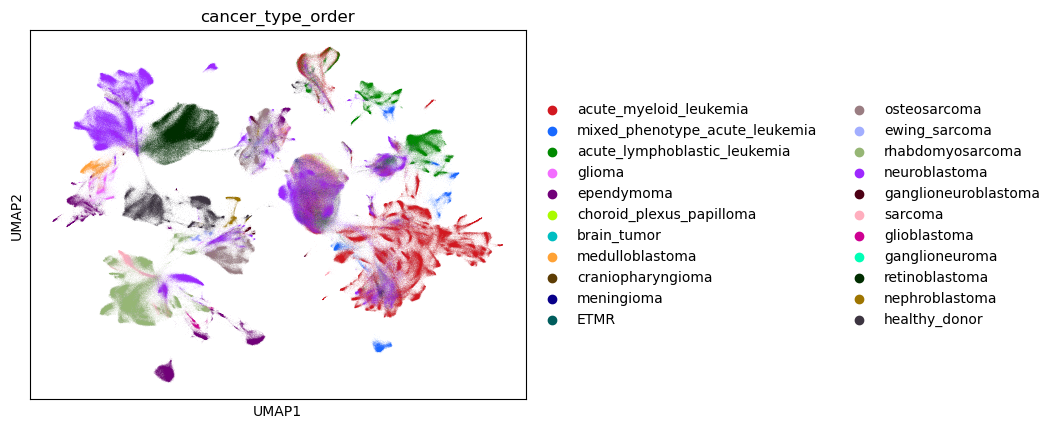

Post-integration

... storing 'cancer_type' as categorical
... storing 'cancer_subtype' as categorical


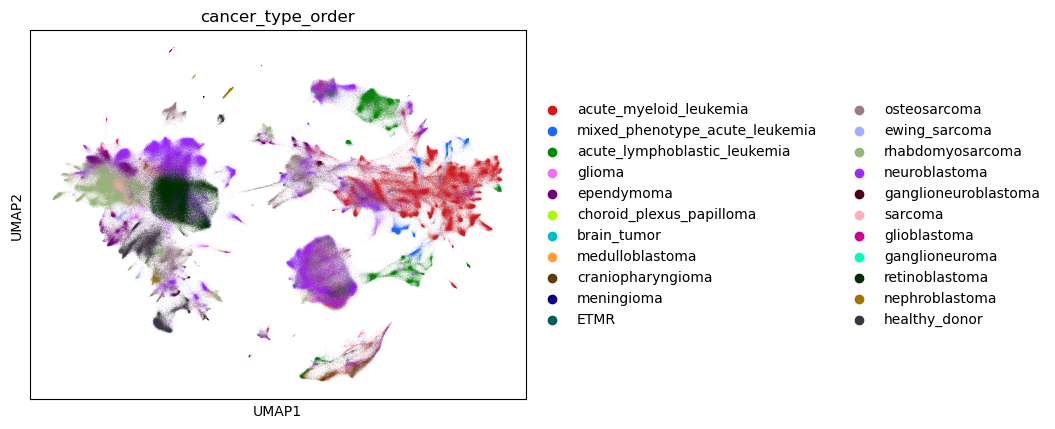

In [120]:
import glasbey

for meta in metas:
    print(meta)
    adata = metas[meta]

    adata.obs['cancer_type_order'] = pd.Categorical(
        values=adata.obs.cancer_type, categories=cancer_type_order, ordered=True
    )

    sc.pl.umap(
        adata,
        color=['cancer_type_order'],
        palette=glasbey.create_palette(palette_size=22), 
    )

In [124]:
prex

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'hvg', 'neighbors', 'pca', 'sample_barcode_colors', 'umap', 'major_cancer_type_order_colors', 'cancer_type_order_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [125]:
postx

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap', 'major_cancer_type_order_colors', 'cancer_type_order_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', '

In [126]:
# Save the cleaned metas
prex.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_pca_clean.h5ad', compression='gzip')
postx.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_cluster_clean.h5ad', compression='gzip')

## 2. Cell annotation with CellTypist

In [2]:
post_clean = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_cluster_clean.h5ad')
post_clean

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', '

In [3]:
post_clean.raw.X.expm1().sum(axis = 1)

matrix([[ 9999.99934143],
        [10000.00051373],
        [ 9999.99982159],
        ...,
        [10000.00001831],
        [ 9999.99974831],
        [10000.00053825]])

It always shows timeout when downloading models here. So we directly download the models from the browser (https://www.celltypist.org/models) and move to `/home/s4543064/.celltypist/data/models`

In [4]:
# Load the immune cell model
model = models.Model.load(model = 'Immune_All_High.pkl')

In [5]:
model

CellTypist model with 32 cell types and 6639 features
    date: 2022-07-16 08:53:00.959521
    details: immune populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: B cells, B-cell lineage, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

In [6]:
model.cell_types

array(['B cells', 'B-cell lineage', 'Cycling cells', 'DC', 'DC precursor',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ETP',
       'Early MK', 'Endothelial cells', 'Epithelial cells',
       'Erythrocytes', 'Erythroid', 'Fibroblasts', 'Granulocytes',
       'HSC/MPP', 'ILC', 'ILC precursor', 'MNP', 'Macrophages',
       'Mast cells', 'Megakaryocyte precursor',
       'Megakaryocytes/platelets', 'Mono-mac', 'Monocyte precursor',
       'Monocytes', 'Myelocytes', 'Plasma cells', 'Promyelocytes',
       'T cells', 'pDC', 'pDC precursor'], dtype=object)

In [8]:
# Predict cell identities using this loaded model
predictions = celltypist.annotate(
    post_clean.raw.to_adata(), 
    model = 'Immune_All_High.pkl', 
    majority_voting = True # the default majority_voting is False, and it's faster
) 

🔬 Input data has 1300958 cells and 7662 genes
🔗 Matching reference genes in the model
🧬 2247 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


In [9]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D,Macrophages,166,Monocytes
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D,Double-positive thymocytes,166,Monocytes
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D,DC,166,Monocytes
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D,Double-positive thymocytes,166,Monocytes
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D,Monocytes,166,Monocytes
...,...,...,...
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_WT-RBG-N_matrix,Double-positive thymocytes,238,Macrophages
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_WT-RBG-N_matrix,Macrophages,238,Macrophages
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_WT-RBG-N_matrix,Macrophages,238,Macrophages
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_WT-RBG-N_matrix,Macrophages,216,Macrophages


In [10]:
adata_annotated = predictions.to_adata(prefix='celltypist_')

In [11]:
adata_annotated

AnnData object with n_obs × n_vars = 1300958 × 7662
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order', 'celltypist_predicted_labels', 'celltypist_over_clustering', 'celltypist_majority_voting', 'celltypist_conf_score'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [12]:
adata_annotated.obs

,cancer_type,dataset,tissue,uni_barcode,disease_progression,sample_barcode,n_genes,n_genes_by_counts,total_counts,total_counts_mt,...,_scvi_batch,_scvi_labels,leiden_scVI,major_cancer_type,major_cancer_type_order,cancer_type_order,celltypist_predicted_labels,celltypist_over_clustering,celltypist_majority_voting,celltypist_conf_score
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGCTAGTGG-1,diagnosis,GSM7512002_Sample4D,2376,2376,11016.0,943.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,Macrophages,166,Monocytes,0.014566
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGGATGCGT-1,diagnosis,GSM7512002_Sample4D,3565,3565,21188.0,1127.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,Double-positive thymocytes,166,Monocytes,0.041038
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGGGTGTTG-1,diagnosis,GSM7512002_Sample4D,2886,2886,11618.0,894.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,DC,166,Monocytes,0.008621
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGTTCGCGC-1,diagnosis,GSM7512002_Sample4D,2986,2986,13508.0,661.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,Double-positive thymocytes,166,Monocytes,0.006639
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGCAATGAATG-1,diagnosis,GSM7512002_Sample4D,2187,2187,9031.0,414.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,Monocytes,166,Monocytes,0.008897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,1976,1976,8004.0,3758.0,...,286,0,7,healthy_donor,healthy_donor,healthy_donor,Double-positive thymocytes,238,Macrophages,0.035551
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,2120,2120,16639.0,12168.0,...,286,0,7,healthy_donor,healthy_donor,healthy_donor,Macrophages,238,Macrophages,0.005597
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,2009,2009,6494.0,2877.0,...,286,0,7,healthy_donor,healthy_donor,healthy_donor,Macrophages,238,Macrophages,0.012868
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,3274,3274,9095.0,433.0,...,286,0,11,healthy_donor,healthy_donor,healthy_donor,Macrophages,216,Macrophages,0.025826


In [13]:
adata_annotated.obs['celltypist_majority_voting'].value_counts()

celltypist_majority_voting
T cells                       424684
Double-positive thymocytes    258579
Macrophages                   233415
Monocytes                     165734
B cells                       110130
Double-negative thymocytes     49771
ILC                            34092
pDC                             7504
DC                              7476
HSC/MPP                         6019
Plasma cells                    3054
Megakaryocytes/platelets         500
Name: count, dtype: int64

In [14]:
adata_annotated.obs['celltypist_conf_score'].describe()

count    1.300958e+06
mean     2.316462e-01
std      3.293196e-01
min      4.289843e-06
25%      1.001099e-02
50%      4.647211e-02
75%      3.388811e-01
max      9.999920e-01
Name: celltypist_conf_score, dtype: float64

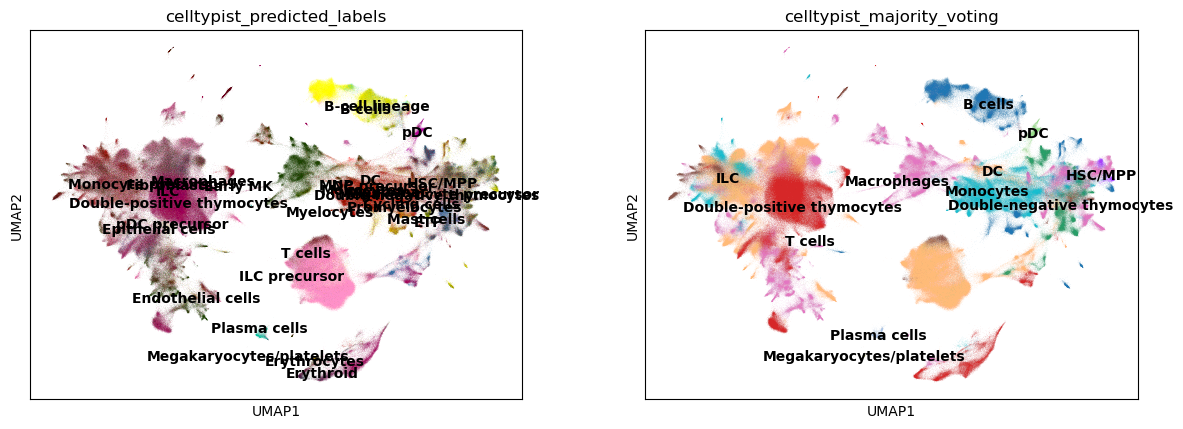

In [16]:
# Since we have calculated the neighborhood info in notebook 2, can directly plot the UMAP
sc.pl.umap(
    adata_annotated, 
    color = ['celltypist_predicted_labels', 'celltypist_majority_voting'],
    legend_loc = 'on data'
)


Since some cells have very low annotation-confidence, we can consider them as unknowns.

In [17]:
# Save the annotated meta AnnData
adata_annotated.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_celltypist_high.h5ad', compression='gzip')

In [2]:
adata_annotated = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_celltypist_high.h5ad')

In [3]:
adata_annotated_unknown = adata_annotated.copy()
adata_annotated_unknown

AnnData object with n_obs × n_vars = 1300958 × 7662
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order', 'celltypist_predicted_labels', 'celltypist_over_clustering', 'celltypist_majority_voting', 'celltypist_conf_score'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'celltypist_majority_voting_colors', 'celltypist_predicted_labels_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'dista

In [4]:
# If the confidence score is less than 0.95, we consider the cell as unknown

adata_annotated_unknown.obs['filtered_cell_labels'] = 'Unknown'
adata_annotated_unknown.obs.loc[adata_annotated_unknown.obs['celltypist_conf_score'] > 0.95, 'filtered_cell_labels'] = adata_annotated_unknown.obs.loc[adata_annotated_unknown.obs['celltypist_conf_score'] > 0.95, 'celltypist_majority_voting']

adata_annotated_unknown.obs

,cancer_type,dataset,tissue,uni_barcode,disease_progression,sample_barcode,n_genes,n_genes_by_counts,total_counts,total_counts_mt,...,_scvi_labels,leiden_scVI,major_cancer_type,major_cancer_type_order,cancer_type_order,celltypist_predicted_labels,celltypist_over_clustering,celltypist_majority_voting,celltypist_conf_score,filtered_cell_labels
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGCTAGTGG-1,diagnosis,GSM7512002_Sample4D,2376,2376,11016.0,943.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,Macrophages,166,Monocytes,0.014566,Unknown
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGGATGCGT-1,diagnosis,GSM7512002_Sample4D,3565,3565,21188.0,1127.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,Double-positive thymocytes,166,Monocytes,0.041038,Unknown
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGGGTGTTG-1,diagnosis,GSM7512002_Sample4D,2886,2886,11618.0,894.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,DC,166,Monocytes,0.008621,Unknown
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGTTCGCGC-1,diagnosis,GSM7512002_Sample4D,2986,2986,13508.0,661.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,Double-positive thymocytes,166,Monocytes,0.006639,Unknown
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGCAATGAATG-1,diagnosis,GSM7512002_Sample4D,2187,2187,9031.0,414.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,Monocytes,166,Monocytes,0.008897,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,1976,1976,8004.0,3758.0,...,0,7,healthy_donor,healthy_donor,healthy_donor,Double-positive thymocytes,238,Macrophages,0.035551,Unknown
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,2120,2120,16639.0,12168.0,...,0,7,healthy_donor,healthy_donor,healthy_donor,Macrophages,238,Macrophages,0.005597,Unknown
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,2009,2009,6494.0,2877.0,...,0,7,healthy_donor,healthy_donor,healthy_donor,Macrophages,238,Macrophages,0.012868,Unknown
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,3274,3274,9095.0,433.0,...,0,11,healthy_donor,healthy_donor,healthy_donor,Macrophages,216,Macrophages,0.025826,Unknown


In [5]:
adata_annotated_unknown.obs['filtered_cell_labels'].value_counts()

filtered_cell_labels
Unknown                       1210714
T cells                         64633
B cells                         14622
Macrophages                      6395
Monocytes                        2784
Double-positive thymocytes       1387
Plasma cells                      160
ILC                               158
Double-negative thymocytes         98
DC                                  4
pDC                                 3
Name: count, dtype: int64

In [6]:
len(adata_annotated_unknown.obs['filtered_cell_labels'].unique())

11

In [28]:
immune_cells = adata_annotated_unknown.obs['filtered_cell_labels'].unique()
immune_cells

['Unknown', 'T cells', 'B cells', 'Double-positive thymocytes', 'Monocytes', ..., 'Plasma cells', 'ILC', 'Double-negative thymocytes', 'pDC', 'DC']
Length: 11
Categories (11, object): ['B cells', 'DC', 'Double-negative thymocytes', 'Double-positive thymocytes', ..., 'Plasma cells', 'T cells', 'Unknown', 'pDC']

... storing 'filtered_cell_labels' as categorical


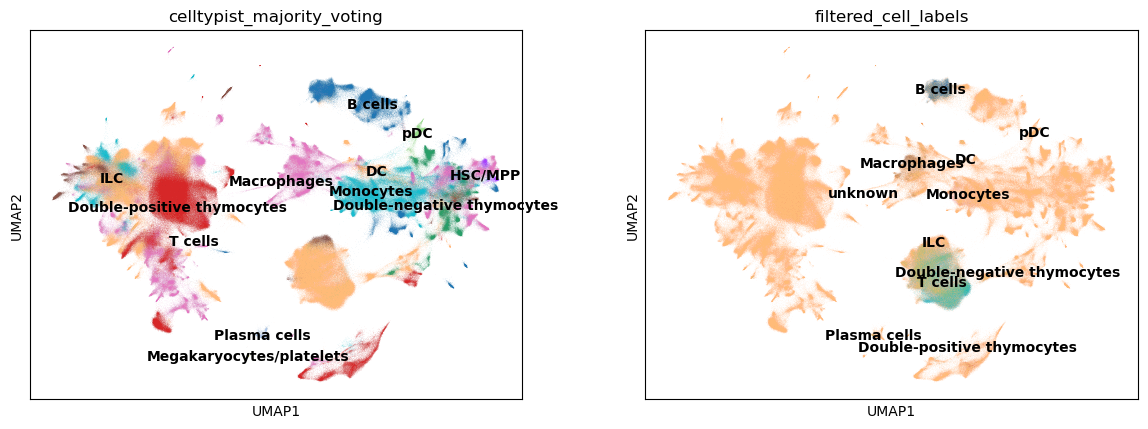

In [7]:
sc.pl.umap(
    adata_annotated_unknown, 
    color = ['celltypist_majority_voting', 'filtered_cell_labels'],
    # groups=immune_cells,
    legend_loc = 'on data'
)

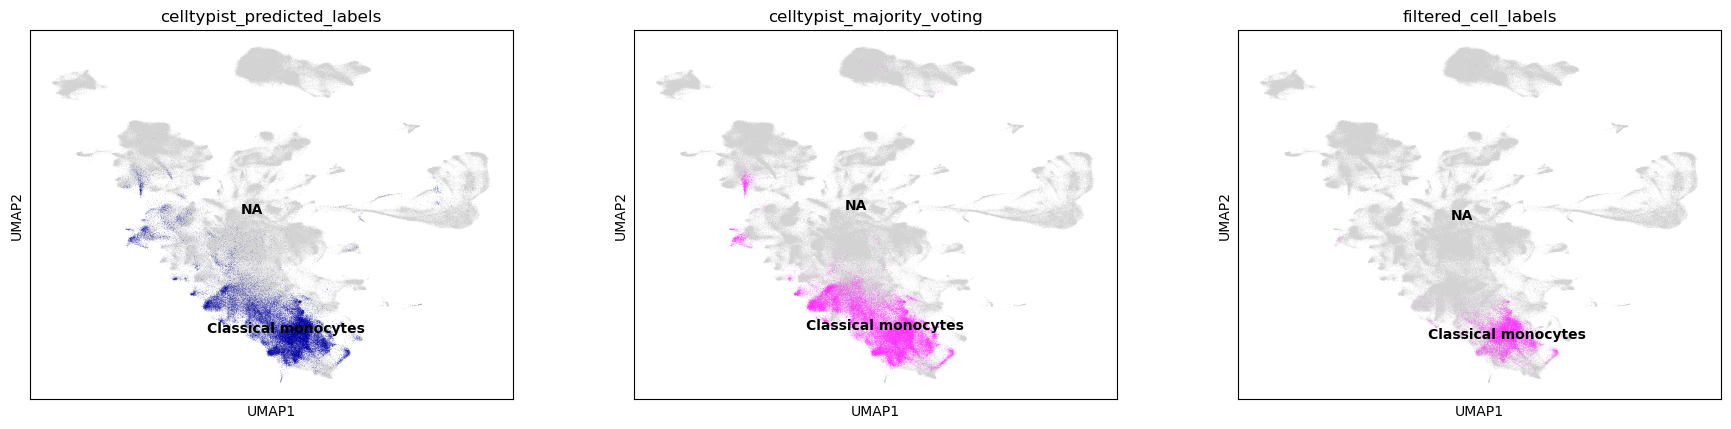

In [39]:
sc.pl.umap(
    adata_annotated_unknown, 
    color = ['celltypist_predicted_labels', 'celltypist_majority_voting', 'filtered_cell_labels'],
    groups=['Classical monocytes'],
    legend_loc = 'on data'
)

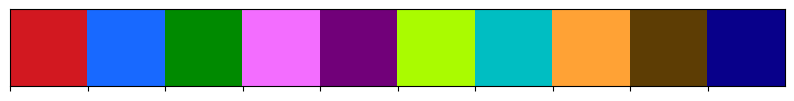

In [8]:
import glasbey
import seaborn as sns

glasbey_palette = glasbey.create_palette(palette_size=10)
sns.palplot(glasbey_palette)

In [9]:
my_palette = {'Unknown': '#ecf0f1'}

count = 0
for cell_type in immune_cells:
    if cell_type not in my_palette:
        my_palette[cell_type] = glasbey_palette[count]
        count += 1

In [65]:
my_palette

{'Unknown': '#ecf0f1',
 'T cells': '#d21820',
 'B cells': '#1869ff',
 'Double-positive thymocytes': '#008a00',
 'Monocytes': '#f36dff',
 'Macrophages': '#710079',
 'Plasma cells': '#aafb00',
 'ILC': '#00bec2',
 'Double-negative thymocytes': '#ffa235',
 'pDC': '#5d3d04',
 'DC': '#08008a'}

In [29]:
type(immune_cells)

pandas.core.arrays.categorical.Categorical

In [34]:
immune_cells = immune_cells.tolist()
immune_cells.remove('Unknown')
immune_cells

['T cells',
 'B cells',
 'Double-positive thymocytes',
 'Monocytes',
 'Macrophages',
 'Plasma cells',
 'ILC',
 'Double-negative thymocytes',
 'pDC',
 'DC']

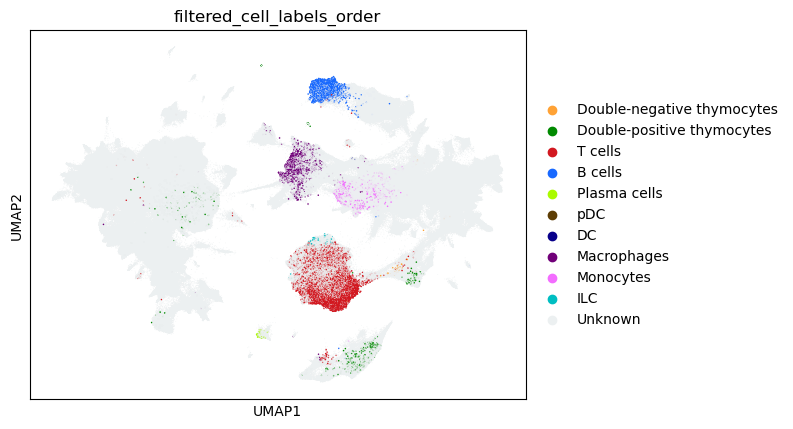

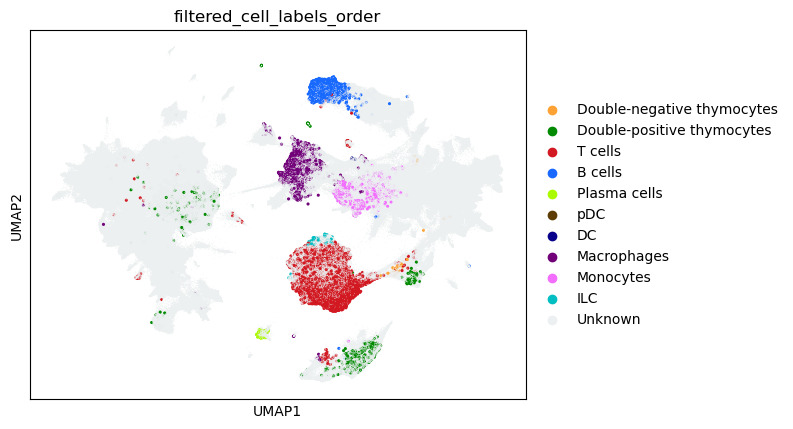

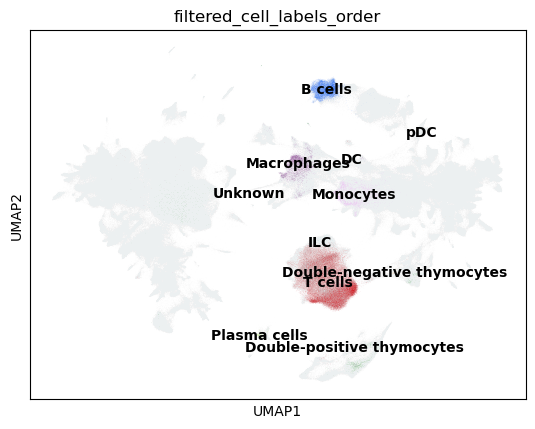

In [41]:
import pandas as pd

filtered_cell_labels_order = ['Double-negative thymocytes', 'Double-positive thymocytes', 'T cells', 'B cells', 'Plasma cells', 'pDC', 'DC', 'Macrophages', 'Monocytes', 'ILC', 'Unknown']

adata_annotated_unknown.obs['filtered_cell_labels_order'] = pd.Categorical(
    values=adata_annotated_unknown.obs.filtered_cell_labels, categories=filtered_cell_labels_order, ordered=True
)
 
sc.pl.umap(
    adata_annotated_unknown, 
    color = ['filtered_cell_labels_order'],
    # groups=immune_cells, 
    palette = my_palette,
    size=[1 if cell == 'Unknown' else 5 for cell in adata_annotated_unknown.obs['filtered_cell_labels_order']],
)

sc.pl.umap(
    adata_annotated_unknown, 
    color = ['filtered_cell_labels_order'],
    # groups=immune_cells, 
    palette = my_palette,
    size=[1 if cell == 'Unknown' else 20 for cell in adata_annotated_unknown.obs['filtered_cell_labels_order']],
)

sc.pl.umap(
    adata_annotated_unknown, 
    color = ['filtered_cell_labels_order'],
    palette = my_palette,
    legend_loc='on data'
)

In [42]:
# Transfer the cell anotations to the pre-integration meta adata
pre = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_pca_clean.h5ad')

In [43]:
prex = pre.copy()

In [44]:
prex.obs['celltypist_majority_voting'] = adata_annotated_unknown.obs['celltypist_majority_voting']
prex.obs['filtered_cell_labels'] = adata_annotated_unknown.obs['filtered_cell_labels']
prex.obs['filtered_cell_labels_order'] = adata_annotated_unknown.obs['filtered_cell_labels_order']

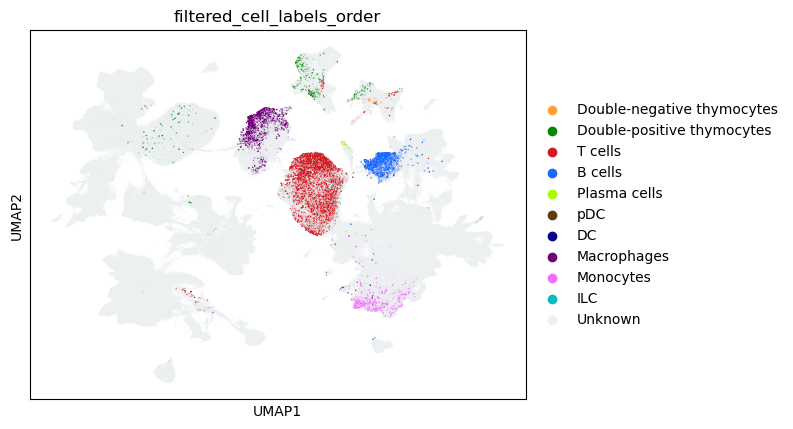

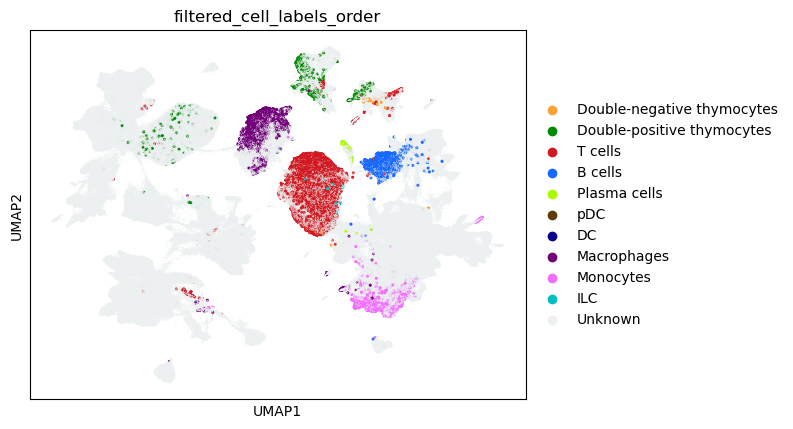

In [46]:
# UMAP before integration
sc.pl.umap(
    prex, 
    color = ['filtered_cell_labels_order'],
    # groups=immune_cells, 
    palette = my_palette,
    size=[1 if cell == 'Unknown' else 5 for cell in prex.obs['filtered_cell_labels_order']],
)

sc.pl.umap(
    prex, 
    color = ['filtered_cell_labels_order'],
    # groups=immune_cells, 
    palette = my_palette,
    size=[1 if cell == 'Unknown' else 20 for cell in prex.obs['filtered_cell_labels_order']],
)

In [47]:
prex

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order', 'celltypist_majority_voting', 'filtered_cell_labels', 'filtered_cell_labels_order'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'hvg', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap', 'filtered_cell_labels_order_colors'
    obsm: 'X_pca', 'X_scVI', '

In [48]:
# Do the clustering for the pre-integration meta
sc.tl.leiden(prex, key_added="leiden_pca", resolution=0.5)

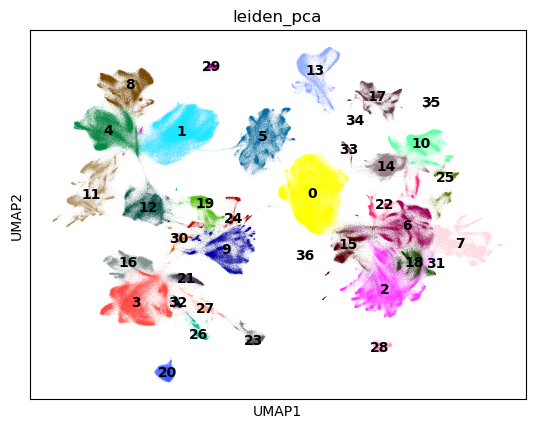

In [49]:
sc.pl.umap(
    prex,
    color=["leiden_pca"],
    legend_loc="on data",
)

In [50]:
# Save the clustered pre-integration meta adata
prex.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_pca_cluster_celltypist_high.h5ad', compression='gzip')

## 3. Compute the immune cell composition

/scratch/temp/9234550/ipykernel_3685491/3848708687.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


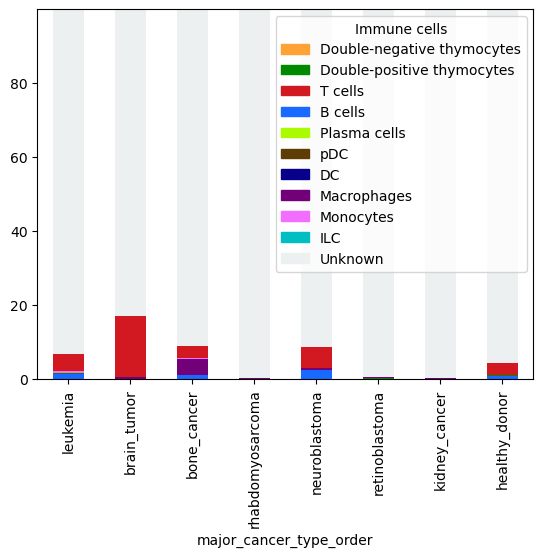

In [70]:
import matplotlib.pyplot as plt

# Immune cell composition for each major cancer type
df = adata_annotated_unknown.obs
df2 = pd.crosstab(df['major_cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns])

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 10, 1, 5, 6, 4, 9]
custom_legend = ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper right', title='Immune cells')

# Custom the legend color
colors = ['#ffa235', '#008a00', '#d21820', '#1869ff', '#aafb00', '#5d3d04', '#08008a', '#710079', '#f36dff', '#00bec2', '#ecf0f1']
for handle, color in zip(custom_legend.legendHandles, colors):
    handle.set_color(color)

plt.show()


/scratch/temp/9234550/ipykernel_3685491/2667340118.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


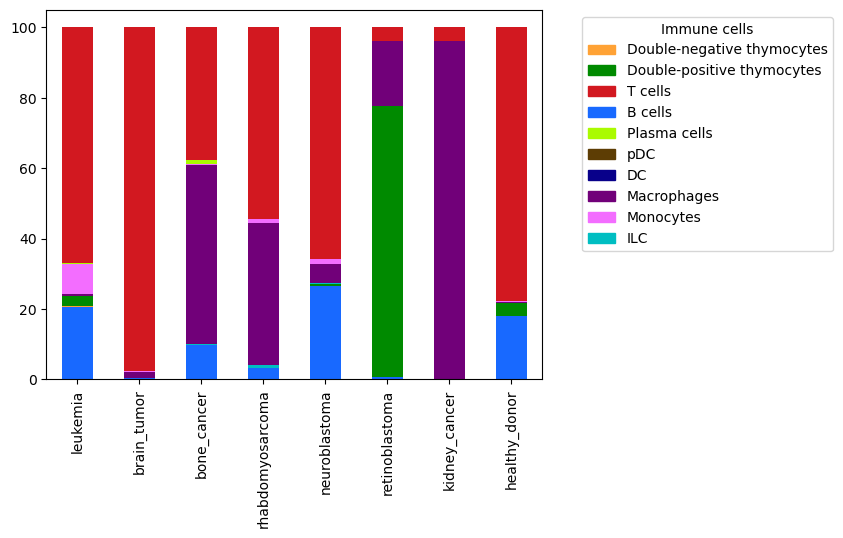

In [94]:
# What if we exclude the unknown celss

# Immune cell composition for each major cancer type
df = adata_annotated_unknown.obs[adata_annotated_unknown.obs['filtered_cell_labels'] != 'Unknown']
df2 = pd.crosstab(df['major_cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns])

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 9, 1, 5, 6, 4]
custom_legend = ax.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order], 
    loc='upper right', title='Immune cells',
    bbox_to_anchor=(1.6, 1)
)

# Custom the legend color
colors = ['#ffa235', '#008a00', '#d21820', '#1869ff', '#aafb00', '#5d3d04', '#08008a', '#710079', '#f36dff', '#00bec2', '#ecf0f1']
for handle, color in zip(custom_legend.legendHandles, colors):
    handle.set_color(color)

# Remove the title of the whole plot
plt.gca().set_xlabel('')

plt.show()

/scratch/temp/9234550/ipykernel_3685491/2702489954.py:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


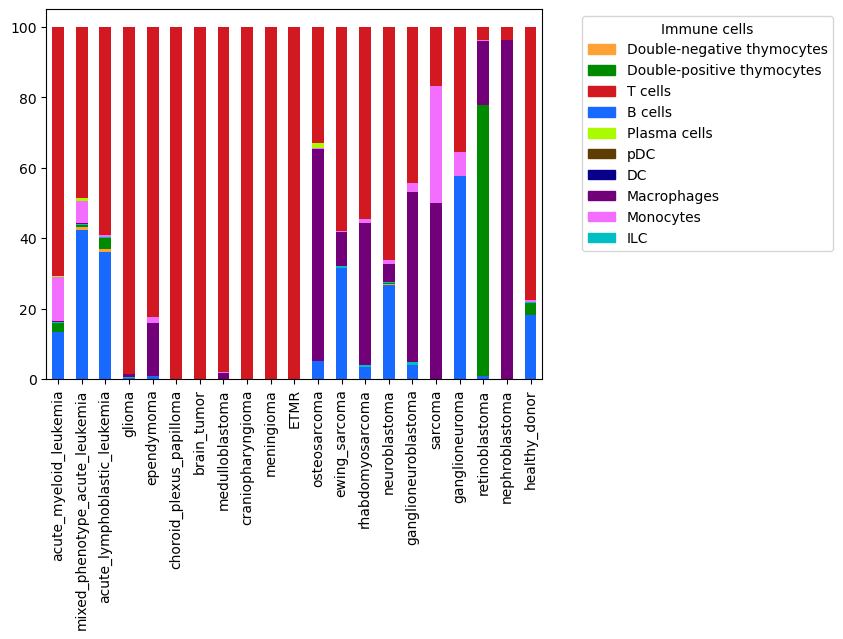

In [95]:
# Immune cell composition for each cancer type
df = adata_annotated_unknown.obs[adata_annotated_unknown.obs['filtered_cell_labels'] != 'Unknown']
df2 = pd.crosstab(df['cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns])

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 9, 1, 5, 6, 4]
custom_legend = ax.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order], 
    loc='upper right', title='Immune cells',
    bbox_to_anchor=(1.6, 1)
)

# Custom the legend color
colors = ['#ffa235', '#008a00', '#d21820', '#1869ff', '#aafb00', '#5d3d04', '#08008a', '#710079', '#f36dff', '#00bec2', '#ecf0f1']
for handle, color in zip(custom_legend.legendHandles, colors):
    handle.set_color(color)

# Remove the title of the whole plot
plt.gca().set_xlabel('')

plt.show()
